In [248]:
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 40)


In [52]:
project_root = os.path.abspath('')
data_path = os.path.join(project_root, 'data')
clean_data_path = os.path.join(data_path, 'clean_data_breaches.csv')

df = pd.read_csv(clean_data_path, header=0)

print('Read data successfully')
print(f'data dimension - row: {df.shape[0]}, column: {df.shape[1]}')

Read data successfully
data dimension - row: 339, column: 10


In [53]:
# preview first 5 records
df.head(5).style

,entity,records_lost,int_records_lost,year,month,sector,method,data_sensitivity,source_name,interesting_story
0,US Customs and Border Protection,"100,000",100000,2019,Jun,government,hacked,2,Washington Post,y
1,Click2Gov,"300,000",300000,2018,Dec,financial,hacked,3,Fortune,n
2,SingHealth,"1,500,000",1500000,2018,Jul,healthcare,hacked,4,Straits Times,n
3,Quest Diagnostics,"11,900,000",11900000,2019,Jun,healthcare,poor security,4,NBC News,n
4,Australian National University,"200,000",200000,2019,Jun,academic,hacked,4,Guardian,n


In [404]:
## data range
data_range = df['year'].max() - df['year'].min()
print(f'Range of data is {data_range}')

Range of year is 20


## 1. Number of records from data breach over the past 20 years

In [405]:
df['int_records_lost'].sum()

13548907610

### More than 13 billion of records lost from data breach over the past 20 years

## 2. Top 5 sectors where data breach happens the most

<AxesSubplot:ylabel='sector'>

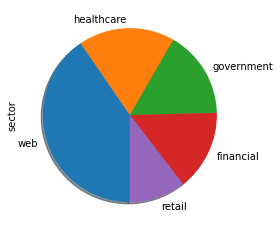

In [289]:
top5_sectors = df['sector'].value_counts().head(5)

top5_sectors.plot.pie(
    startangle=-90,
    counterclock=False,
    shadow=True
)

From the above approximate 13 billion records, the top 5 sectors where data breach happens and its cases report are:
- `web`, case report `97`
- `healthcare`, case report `43`
- `government`, case report `39`
- `financial`, case report `36`
- `retail`, case report `25`

## 3. Each of the top 5 sectors where data breach happened, what type of method on data breach happen the most. 

In [351]:
def get_databreach_methods_from_sector(df, sectors):
    output = []
    for sector in sectors:
        sector_df = df[df['sector'] == sector]
        top_method = sector_df['method'].value_counts().head(1)
        method = top_method.index[0]
        frequency = top_method[0]

        output.append({'sector':sector, 'method': method, 'frequency': frequency})
    return output

In [352]:
top5_sectors = df['sector'].value_counts().head(5)
sectors_list = top5_sectors.index.tolist()
data_breach_stats_per_sector = get_databreach_methods_from_sector(df, sectors_list)

for row in data_breach_stats_per_sector:
    print(f'Sector: {row["sector"]}, method: {row["method"]} : {row["frequency"]}')

Sector: web, method: hacked : 82
Sector: healthcare, method: lost device  : 20
Sector: government, method: hacked : 16
Sector: financial, method: hacked : 20
Sector: retail, method: hacked : 17


## 3.1 Each of the top 5 sectors, list the top 3 methods with percentage that cause data breach the most


In [389]:
for sector in sectors_list:
    data = df[df['sector']==sector]
    methods = data['method'].value_counts(normalize=True)*100.0
    print(sector)
    print(methods)
    print('---')
    

web
hacked           84.536082
poor security    11.340206
oops!             3.092784
inside job        1.030928
Name: method, dtype: float64
---
healthcare
lost device      46.511628
hacked           39.534884
poor security     6.976744
inside job        4.651163
oops!             2.325581
Name: method, dtype: float64
---
government
hacked           41.025641
lost device      23.076923
oops!            17.948718
inside job       12.820513
poor security     5.128205
Name: method, dtype: float64
---
financial
hacked           55.555556
inside job       16.666667
lost device      16.666667
poor security     8.333333
oops!             2.777778
Name: method, dtype: float64
---
retail
hacked           68.0
poor security    12.0
lost device       8.0
oops!             8.0
inside job        4.0
Name: method, dtype: float64
---


## 4-5. From top 5 sectors, which type of data sensitivity get leaked the most

In [54]:
def get_leak_most_data_sense(df, sector, method):
    is_sector = df["sector"] == sector
    is_method = df["method"] == method
    data_sense = df[is_sector & is_method]['data_sensitivity']
    leak_most = data_sense.value_counts().head(1)
    return [leak_most.index[0], leak_most.max()]

In [64]:
for row in data_breach_stats_per_sector:
    data_sense, data_sense_cnt = get_leak_most_data_sense(df, row['sector'], row['method'])
    print(f'Sector: "{row["sector"]}" : {row["method"]} data_sensitivity: {data_sense}, {data_sense_cnt}/{row["frequency"]} times or {(data_sense_cnt/row["frequency"]*100.0):.2f}%')

Sector: "web" : hacked data_sensitivity: 1, 47/82 times or 57.32%
Sector: "healthcare" : lost device  data_sensitivity: 4, 12/20 times or 60.00%
Sector: "government" : hacked data_sensitivity: 2, 7/16 times or 43.75%
Sector: "financial" : hacked data_sensitivity: 3, 7/20 times or 35.00%
Sector: "retail" : hacked data_sensitivity: 3, 11/17 times or 64.71%


#### Check healthcare in more detail as it sounds strange that majority of data breach are from lost device

In [344]:
# find secondary method of healthcare data breach
is_sector = df["sector"] == 'healthcare'
data_sense = df[is_sector ]['method']
second_method = data_sense.value_counts().index[1]
second_method_cnt = data_sense.value_counts()[1]
second_method_pct = data_sense.value_counts(normalize=True)[1]

print('percentage of each method in healthcare')
print(f'{data_sense.value_counts(normalize=True)*100}')
print(f'hacking percentage from healthcare: {second_method_pct*100.0:.2f}%')

percentage of each method in healthcare
lost device      46.511628
hacked           39.534884
poor security     6.976744
inside job        4.651163
oops!             2.325581
Name: method, dtype: float64
hacking percentage from healthcare: 39.53%


So the secondary methods of health data breach is via hacking with about 40%. Now let's see what type of data sensitivity does hacking target at.

In [331]:
hc_data_sense, hc_data_cnt = get_leak_most_data_sense(df, 'healthcare', 'hacked')

print(f'Sector: healthcare : hacked data_sensitivity type: {hc_data_sense}, {hc_data_cnt}/{second_method_cnt} cases or {(hc_data_cnt/second_method_cnt*100.0):.2f}%')

Sector: healthcare : hacked data_sensitivity type: 4, 7/17 cases or 41.18%


- In the `web` sector, it suffered the most with total of 97 data breach reports where 82 cases are reported of data breach from <u>hacking</u> with 57% of data disclosure that exposed email address and online information from hacking.

- `healthcare` sector is targeted the second target with total of 43 cases where 46% of the cases of data breach are from <u>lost device</u> and data breach from <u>hacking</u> about 40% which cause their health and personal records exposed.

- Regarding the `government` sector, there are about 44% from its total reported of hacking where the target data is about social security number and personal details.

- In terms of `financial` sector, major data breach is from hacking with 20 incidents or 55%. From the hacking incidents, the data that got exposed is mainly credit-card information.

- In the `Retail` sector, there are 25 cases reported. About 68% or 17 cases are from hacking, in which credit card information got exposed the most.

## 6. From top 5 sectors, which data source should provide us more information or updated news.
This is to give stakeholders some clue which source of information will keep us updated if data breach happens with them

In [108]:
def get_top_source_name_from_sector(df, sector):
    sector_df = df[df['sector']==sector]
    vc_sector_df = sector_df['source_name'].value_counts().head(3)
    return vc_sector_df

In [113]:
for sector in top5_sectors.index:
    top_sources = get_top_source_name_from_sector(df,sector)
    print(f'{sector}\n\n{top_sources}\n---\n')

web

The Register    8
The Guardian    5
Motherboard     5
Name: source_name, dtype: int64
---

healthcare

Data Breaches    5
Emory            1
Boston Globe     1
Name: source_name, dtype: int64
---

government

BBC News            6
Business Insider    3
Data Breaches       2
Name: source_name, dtype: int64
---

financial

Reuters              3
Krebs on Security    2
PC World             2
Name: source_name, dtype: int64
---

retail

The Guardian    2
Techcrunch      2
Slashdot        1
Name: source_name, dtype: int64
---



## 7. Companies that their records are ALL leaked out

In [425]:
all_data_lost = df[df['records_lost']=='ALL']
all_data_lost[['entity','sector']]

,entity,sector
15,Animoto,app
22,CoffeeMeetsBagel,web
32,Petflow,retail


## 8. The most popular data breaching method per data sensitivity

In [95]:
def get_databreach_from_sensitivity(df, sense):
    """
    Get method of data breachingj, its count, and its total based on
    the data sensitivity input.
    """
    data_sense_df = df[df['data_sensitivity']==sense]
    vc_data_sense = data_sense_df['method'].value_counts().head(1)
    return vc_data_sense.index[0], vc_data_sense.max(), data_sense_df.shape[0]


In [397]:
for data_sense_type in sorted(df['data_sensitivity'].unique()):
    method_cnt = get_databreach_from_sensitivity(df, data_sense_type)
    print(f'Data Type:{data_sense_type}, method: {method_cnt[0]}, cases: {method_cnt[1]}')

Data Type:1, method: hacked, cases: 87
Data Type:2, method: hacked, cases: 49
Data Type:3, method: hacked, cases: 34
Data Type:4, method: hacked, cases: 28
Data Type:5, method: hacked, cases: 15
Data Type:7, method: hacked, cases: 1


## 9. Is the most frequent data-leaked entities and the the most frequent data-leaked sectors referred to the same sectors? 


In [415]:
def get_sector_cnt_from_entity(df, entity):
    entity_df = df[df['entity']==entity]
    vc_entity = entity_df['sector'].value_counts()
    return vc_entity.index[0], vc_entity[0]
get_sector_cnt_from_entity(df,'AOL')

('web', 3)

In [420]:
# get the most frequently data-leaked entities
grouped_entity = df.groupby(['entity']).size()
freq_data_leak_entity = grouped_entity[ 
    grouped_entity == grouped_entity.max() 
    ]
# from the above entities, find their sectors
for entity in freq_data_leak_entity.index:
    entity_sector, entity_cnt = get_sector_cnt_from_entity(df, entity)
    print(f'{entity}\'s sector: {entity_sector}, count:{entity_cnt}')



AOL's sector: web, count:3
Citigroup's sector: financial, count:3
Facebook's sector: web, count:3
Yahoo's sector: web, count:3


We can see that the main sector from those frequent data-leaked entities are from `web` and `financial`

In [424]:
# get the most frequently data-leaked sectors
df['sector'].value_counts(normalize=True).head(5)*100

web           28.613569
healthcare    12.684366
government    11.504425
financial     10.619469
retail         7.374631
Name: sector, dtype: float64

## Findings
As we can see, `web` sector got data breached the most. So that means any companies in the `web` sector can be potentiall exposed to 30% data breach where main data target is online information and email address exposed by hacking.

For any stakeholders who are concerned if their sector get compromised, then following sources is beneficial to keep checking:
- The Register 
- The Guardian
- Motherboard 